In [1]:
import numpy as np
import sympy as sy
import matplotlib.pyplot as plt
import simtk.openmm as mm
import simtk.unit as unit
import simtk.openmm.app as app
from tqdm import tqdm
import random

In [2]:
# Definiendo el toy model

n_particles = 1
system = mm.System()
mass   = 14.007 * unit.amu # masa del átomo N
system.addParticle(mass)

force = mm.CustomExternalForce('Eo*(C*x^4-x^2)+M*x + (K/2.0)*(y^2+z^2)')
force.addGlobalParameter('K', 35 * unit.kilocalories_per_mole/unit.angstrom**2)
force.addGlobalParameter('Eo', 6.0 * unit.kilocalories_per_mole/unit.angstrom**2)
force.addGlobalParameter('C', 0.4 * 1/unit.angstrom**2)
force.addGlobalParameter('M', 0.25 * unit.kilocalories_per_mole/unit.angstrom)
force.addParticle(0, [])
system.addForce(force)

0

In [3]:
# Intento de 4 réplicas

kB = unit.BOLTZMANN_CONSTANT_kB * unit.AVOGADRO_CONSTANT_NA
temperature = 300*unit.kelvin
pressure    = None
    
step_size       = 0.01*unit.picoseconds
num_steps       = 20000
saving_period   = 100
num_steps_saved = int(num_steps/saving_period)

friction   = 1.0/unit.picosecond
integrator = mm.LangevinIntegrator(temperature, friction, step_size)

platform_name = 'CPU'  
platform = mm.Platform.getPlatformByName(platform_name)
    
times      = unit.Quantity(np.zeros([num_steps_saved], np.float32), unit.picoseconds)
positions  = unit.Quantity(np.zeros([num_steps_saved,3], np.float32), unit.angstroms)
velocities = unit.Quantity(np.zeros([num_steps_saved,3], np.float32), unit.angstroms/unit.picosecond)
potential_energies   = unit.Quantity(np.zeros([num_steps_saved], np.float32), unit.kilocalories_per_mole)
kinetic_energies    = unit.Quantity(np.zeros([num_steps_saved], np.float32), unit.kilocalories_per_mole)

initial_positions  = np.zeros([n_particles, 3], np.float32) * unit.nanometers

initial_velocities = None # Las velocidades serán adjudicadas aleatoriamente según la distribución Maxwell-Boltzmann del estado termodinámico

context = mm.Context(system, integrator, platform)
context.setPositions(initial_positions)
context.setVelocitiesToTemperature(temperature)

state = context.getState(getEnergy=True, getPositions=True, getVelocities=True)
times[0] = state.getTime()
positions[0] = state.getPositions()[0]
velocities[0] = state.getVelocities()[0]
kinetic_energies[0]=state.getKineticEnergy()
potential_energies[0]=state.getPotentialEnergy()

for ii in tqdm(range(num_steps_saved)):
    context.getIntegrator().step(saving_period)
    state = context.getState(getEnergy=True, getPositions=True, getVelocities=True)
    times[ii] = state.getTime()
    positions[ii] = state.getPositions()[0]
    velocities[ii] = state.getVelocities()[0]
    kinetic_energies[ii]=state.getKineticEnergy()
    potential_energies[ii]=state.getPotentialEnergy()
    
temperature2 = 305*unit.kelvin
step_size2       = 0.01*unit.picoseconds
num_steps2       = 20000
saving_period2   = 100
num_steps_saved2 = int(num_steps/saving_period)

friction2   = 1.0/unit.picosecond
integrator2 = mm.LangevinIntegrator(temperature2, friction2, step_size2)

times2      = unit.Quantity(np.zeros([num_steps_saved2], np.float32), unit.picoseconds)
positions2  = unit.Quantity(np.zeros([num_steps_saved2,3], np.float32), unit.angstroms)
velocities2 = unit.Quantity(np.zeros([num_steps_saved2,3], np.float32), unit.angstroms/unit.picosecond)
potential_energies2   = unit.Quantity(np.zeros([num_steps_saved2], np.float32), unit.kilocalories_per_mole)
kinetic_energies2     = unit.Quantity(np.zeros([num_steps_saved2], np.float32), unit.kilocalories_per_mole)

initial_positions2  = np.zeros([n_particles, 3], np.float32) * unit.nanometers

initial_velocities = None # Las velocidades serán adjudicadas aleatoriamente según la distribución Maxwell-Boltzmann del estado termodinámico

context2 = mm.Context(system, integrator2, platform)
context2.setPositions(initial_positions2)
context2.setVelocitiesToTemperature(temperature2)

state2 = context2.getState(getEnergy=True, getPositions=True, getVelocities=True)
times2[0] = state2.getTime()
positions2[0] = state2.getPositions()[0]
velocities2[0] = state2.getVelocities()[0]
kinetic_energies2[0]=state2.getKineticEnergy()
potential_energies2[0]=state2.getPotentialEnergy()
    
for jj in tqdm(range(num_steps_saved)):
    context2.getIntegrator().step(saving_period)
    state2 = context2.getState(getEnergy=True, getPositions=True, getVelocities=True)
    times2[jj] = state2.getTime()
    positions2[jj] = state2.getPositions()[0]
    velocities2[jj] = state2.getVelocities()[0]
    kinetic_energies2[jj]=state2.getKineticEnergy()
    potential_energies[jj]=state2.getPotentialEnergy()
    
temperature3 = 310*unit.kelvin
pressure    = None

step_size3       = 0.01*unit.picoseconds
num_steps3       = 20000
saving_period3   = 100
num_steps_saved3 = int(num_steps/saving_period)

friction3   = 1.0/unit.picosecond
integrator3 = mm.LangevinIntegrator(temperature3, friction3, step_size3)

platform_name = 'CPU'  
platform = mm.Platform.getPlatformByName(platform_name)
    
times3      = unit.Quantity(np.zeros([num_steps_saved3], np.float32), unit.picoseconds)
positions3  = unit.Quantity(np.zeros([num_steps_saved3,3], np.float32), unit.angstroms)
velocities3 = unit.Quantity(np.zeros([num_steps_saved3,3], np.float32), unit.angstroms/unit.picosecond)
potential_energies3   = unit.Quantity(np.zeros([num_steps_saved3], np.float32), unit.kilocalories_per_mole)
kinetic_energies3    = unit.Quantity(np.zeros([num_steps_saved3], np.float32), unit.kilocalories_per_mole)
    
initial_positions3  = np.zeros([n_particles, 3], np.float32) * unit.nanometers
    
#initial_velocities = None # Las velocidades serán adjudicadas aleatoriamente según la distribución Maxwell-Boltzmann del estado termodinámico
    
context3 = mm.Context(system, integrator3, platform)
context3.setPositions(initial_positions3)
context3.setVelocitiesToTemperature(temperature3)
    
state3 = context.getState(getEnergy=True, getPositions=True, getVelocities=True)
times3[0] = state3.getTime()
positions3[0] = state3.getPositions()[0]
velocities3[0] = state3.getVelocities()[0]
kinetic_energies3[0]=state3.getKineticEnergy()
potential_energies3[0]=state3.getPotentialEnergy()
    
for ii in tqdm(range(num_steps_saved)):
    context3.getIntegrator().step(saving_period)
    state3 = context3.getState(getEnergy=True, getPositions=True, getVelocities=True)
    times3[ii] = state3.getTime()
    positions3[ii] = state3.getPositions()[0]
    velocities3[ii] = state3.getVelocities()[0]
    kinetic_energies3[ii]=state3.getKineticEnergy()
    potential_energies3[ii]=state3.getPotentialEnergy()
    

temperature4 = 315*unit.kelvin
integrator4 = mm.LangevinIntegrator(temperature4, friction, step_size)

times4      = unit.Quantity(np.zeros([num_steps_saved], np.float32), unit.picoseconds)
positions4  = unit.Quantity(np.zeros([num_steps_saved,3], np.float32), unit.angstroms)
velocities4 = unit.Quantity(np.zeros([num_steps_saved,3], np.float32), unit.angstroms/unit.picosecond)
potential_energies4   = unit.Quantity(np.zeros([num_steps_saved], np.float32), unit.kilocalories_per_mole)
kinetic_energies4     = unit.Quantity(np.zeros([num_steps_saved], np.float32), unit.kilocalories_per_mole)
    
initial_positions4  = np.zeros([n_particles, 3], np.float32) * unit.nanometers

#initial_velocities = None # Las velocidades serán adjudicadas aleatoriamente según la distribución Maxwell-Boltzmann del estado termodinámico

context4 = mm.Context(system, integrator4, platform)
context4.setPositions(initial_positions4)
context4.setVelocitiesToTemperature(temperature4)
    
state4 = context4.getState(getEnergy=True, getPositions=True, getVelocities=True)
times4[0] = state4.getTime()
positions4[0] = state4.getPositions()[0]
velocities4[0] = state4.getVelocities()[0]
kinetic_energies4[0]=state4.getKineticEnergy()
potential_energies4[0]=state4.getPotentialEnergy()
    
for jj in tqdm(range(num_steps_saved)):
    context4.getIntegrator().step(saving_period)
    state4 = context4.getState(getEnergy=True, getPositions=True, getVelocities=True)
    times4[jj] = state4.getTime()
    positions4[jj] = state4.getPositions()[0]
    velocities4[jj] = state4.getVelocities()[0]
    kinetic_energies4[jj]=state4.getKineticEnergy()
    potential_energies4[jj]=state4.getPotentialEnergy()

100%|██████████| 200/200 [00:03<00:00, 57.13it/s]


In [4]:
# Analizando las reṕlicas

print("Analizando réplicas")
kBT1 = kB * temperature
kBT2 = kB * temperature2


delta = (1.0/kBT2 -1.0/kBT1)*(potential_energies[-1]-potential_energies2[-1])

print("Evaluando intercambio entre R1 y R2")
if delta <= 0:
    P1 = 1
elif delta > 0:
        Ex = np.exp(-(delta))
        rnd=random.random()
        if rnd <= Ex:
            P1 = 1
            if P1 > 0:
                print("Intercambiando R1 y R2")
                timesc1      = unit.Quantity(np.zeros([num_steps_saved], np.float32), unit.picoseconds)
                positionsc1  = unit.Quantity(np.zeros([num_steps_saved,3], np.float32), unit.angstroms)
                velocitiesc1 = unit.Quantity(np.zeros([num_steps_saved,3], np.float32), unit.angstroms/unit.picosecond)
                potential_energiesc1 = unit.Quantity(np.zeros([num_steps_saved], np.float32), unit.kilocalories_per_mole)
                kinetic_energiesc1 = unit.Quantity(np.zeros([num_steps_saved], np.float32), unit.kilocalories_per_mole)

                initial_positions  = positions2[-1] 

                initial_velocities = velocities2[-1]

                temperature = 305*unit.kelvin
                context.setVelocitiesToTemperature(temperature)

                state = context.getState(getEnergy=True, getPositions=True, getVelocities=True)
                timesc1[ii] = state.getTime()
                positionsc1[ii] = state.getPositions()[0]
                velocitiesc1[ii] = state.getVelocities()[0]
                kinetic_energiesc1[ii]=state.getKineticEnergy()
                potential_energiesc1[ii]=state.getPotentialEnergy()

                for ii in tqdm(range(num_steps_saved)):
                    context.getIntegrator().step(saving_period)
                    state = context.getState(getEnergy=True, getPositions=True, getVelocities=True)
                    timesc1[ii] = state.getTime()
                    positionsc1[ii] = state.getPositions()[0]
                    velocitiesc1[ii] = state.getVelocities()[0]
                    kinetic_energiesc1[ii]=state.getKineticEnergy()
                    potential_energiesc1[ii]=state.getPotentialEnergy()

                times      = np.append(times,timesc1)* unit.picoseconds
                positions  = np.append(positions,positionsc1, axis =0)* unit.angstroms
                velocities = np.append(velocities,velocitiesc1, axis =0) * unit.angstroms/unit.picosecond
                potential_energies = np.append(potential_energies,potential_energiesc1, axis =0)* unit.kilocalories_per_mole
                kinetic_energies = np.append(kinetic_energies, kinetic_energiesc1, axis =0) * unit.kilocalorie_per_mole

                timesc2      = unit.Quantity(np.zeros([num_steps_saved], np.float32), unit.picoseconds)
                positionsc2  = unit.Quantity(np.zeros([num_steps_saved,3], np.float32), unit.angstroms)
                velocitiesc2 = unit.Quantity(np.zeros([num_steps_saved,3], np.float32), unit.angstroms/unit.picosecond)
                potential_energiesc2 = unit.Quantity(np.zeros([num_steps_saved], np.float32), unit.kilocalories_per_mole)
                kinetic_energiesc2 = unit.Quantity(np.zeros([num_steps_saved], np.float32), unit.kilocalories_per_mole)

                initial_positions2  = positions[-1]
                initial_velocities2 = velocities[-1]

                temperature2 = 300*unit.kelvin
                context2.setVelocitiesToTemperature(temperature2)

                state2 = context2.getState(getEnergy=True, getPositions=True, getVelocities=True)
                timesc2[ii] = state2.getTime()
                positionsc2[ii] = state2.getPositions()[0]
                velocitiesc2[ii] = state2.getVelocities()[0]
                kinetic_energiesc2[ii]=state2.getKineticEnergy()
                potential_energiesc2[ii]=state2.getPotentialEnergy()

                for jj in tqdm(range(num_steps_saved)):
                    context2.getIntegrator().step(saving_period)
                    state2 = context2.getState(getEnergy=True, getPositions=True, getVelocities=True)
                    timesc2[jj] = state2.getTime()
                    positionsc2[jj] = state2.getPositions()[0]
                    velocitiesc2[jj] = state2.getVelocities()[0]
                    kinetic_energiesc2[jj]=state2.getKineticEnergy()
                    potential_energiesc2[jj]=state2.getPotentialEnergy()

                times2      = np.append(times,timesc2)* unit.picoseconds
                positions2  = np.append(positions,positionsc2, axis =0)* unit.angstroms
                velocities2 = np.append(velocities,velocitiesc2, axis =0) * unit.angstroms/unit.picosecond
                potential_energies2 = np.append(potential_energies,potential_energiesc2, axis =0)* unit.kilocalories_per_mole
                kinetic_energies2 = np.append(kinetic_energies, kinetic_energiesc2, axis =0) * unit.kilocalorie_per_mole

            else:
                P1 = 0
                print("R1 y R2 no se intercambian")

                
                
kBT3 = kB * temperature3
kBT4 = kB * temperature4
delta2 = (1.0/kBT4 -1.0/kBT3)*(potential_energies3[-1]-potential_energies4[-1])

print("Evaluando intercambio entre R3 y R4")
if delta2 <= 0:
    P2 = 1
elif delta2 > 0:
    Ex2 = np.exp(-(delta2))
    rnd=random.random()
    if rnd <= Ex2:
        P2 = 1
        if P2 > 0:
            print("Intercambiando R3 y R4")
            timesc3      = unit.Quantity(np.zeros([num_steps_saved], np.float32), unit.picoseconds)
            positionsc3  = unit.Quantity(np.zeros([num_steps_saved,3], np.float32), unit.angstroms)
            velocitiesc3 = unit.Quantity(np.zeros([num_steps_saved,3], np.float32), unit.angstroms/unit.picosecond)
            potential_energiesc3 = unit.Quantity(np.zeros([num_steps_saved], np.float32), unit.kilocalories_per_mole)
            kinetic_energiesc3 = unit.Quantity(np.zeros([num_steps_saved], np.float32), unit.kilocalories_per_mole)

            timesc3      = unit.Quantity(np.zeros([num_steps_saved], np.float32), unit.picoseconds)
            positionsc3  = unit.Quantity(np.zeros([num_steps_saved,3], np.float32), unit.angstroms)
            velocitiesc3 = unit.Quantity(np.zeros([num_steps_saved,3], np.float32), unit.angstroms/unit.picosecond)
            potential_energiesc3 = unit.Quantity(np.zeros([num_steps_saved], np.float32), unit.kilocalories_per_mole)
            kinetic_energiesc3 = unit.Quantity(np.zeros([num_steps_saved], np.float32), unit.kilocalories_per_mole)

            initial_positions3  = positions4[-1] 
            initial_velocities3 = velocities4[-1]

            temperature3 = 315*unit.kelvin
            context.setVelocitiesToTemperature(temperature3)

            state3 = context3.getState(getEnergy=True, getPositions=True, getVelocities=True)
            timesc3[ii] = state3.getTime()
            positionsc3[ii] = state3.getPositions()[0]
            velocitiesc3[ii] = state3.getVelocities()[0]
            kinetic_energiesc3[ii]=state3.getKineticEnergy()
            potential_energiesc3[ii]=state3.getPotentialEnergy()

            for ii in tqdm(range(num_steps_saved)):
                context3.getIntegrator().step(saving_period)
                state3 = context3.getState(getEnergy=True, getPositions=True, getVelocities=True)
                timesc3[ii] = state3.getTime()
                positionsc3[ii] = state3.getPositions()[0]
                velocitiesc3[ii] = state3.getVelocities()[0]
                kinetic_energiesc3[ii]=state3.getKineticEnergy()
                potential_energiesc3[ii]=state3.getPotentialEnergy()

            times3      = np.append(times,timesc3)* unit.picoseconds
            positions3  = np.append(positions,positionsc3, axis =0)* unit.angstroms
            velocities3 = np.append(velocities,velocitiesc3, axis =0) * unit.angstroms/unit.picosecond
            potential_energies3 = np.append(potential_energies,potential_energiesc3, axis =0)* unit.kilocalories_per_mole
            kinetic_energies3 = np.append(kinetic_energies, kinetic_energiesc3, axis =0) * unit.kilocalorie_per_mole

            timesc4      = unit.Quantity(np.zeros([num_steps_saved], np.float32), unit.picoseconds)
            positionsc4  = unit.Quantity(np.zeros([num_steps_saved,3], np.float32), unit.angstroms)
            velocitiesc4 = unit.Quantity(np.zeros([num_steps_saved,3], np.float32), unit.angstroms/unit.picosecond)
            potential_energiesc4 = unit.Quantity(np.zeros([num_steps_saved], np.float32), unit.kilocalories_per_mole)
            kinetic_energiesc4 = unit.Quantity(np.zeros([num_steps_saved], np.float32), unit.kilocalories_per_mole)

            initial_positions4  = positions3[-1]
            initial_velocities4 = velocities3[-1]

            temperature4 = 310*unit.kelvin
            context4.setVelocitiesToTemperature(temperature4)

            state4 = context4.getState(getEnergy=True, getPositions=True, getVelocities=True)
            timesc4[ii] = state4.getTime()
            positionsc4[ii] = state4.getPositions()[0]
            velocitiesc4[ii] = state4.getVelocities()[0]
            kinetic_energiesc4[ii]=state4.getKineticEnergy()
            potential_energiesc4[ii]=state4.getPotentialEnergy()

            for jj in tqdm(range(num_steps_saved)):
                context4.getIntegrator().step(saving_period)
                state4 = context4.getState(getEnergy=True, getPositions=True, getVelocities=True)
                timesc4[jj] = state4.getTime()
                positionsc4[jj] = state4.getPositions()[0]
                velocitiesc4[jj] = state4.getVelocities()[0]
                kinetic_energiesc4[jj]=state4.getKineticEnergy()
                potential_energiesc4[jj]=state4.getPotentialEnergy()

            times4      = np.append(times,timesc4)* unit.picoseconds
            positions4  = np.append(positions,positionsc4, axis =0)* unit.angstroms
            velocities4 = np.append(velocities,velocitiesc4, axis =0) * unit.angstroms/unit.picosecond
            potential_energies4 = np.append(potential_energies,potential_energiesc4, axis =0)* unit.kilocalories_per_mole
            kinetic_energies4 = np.append(kinetic_energies, kinetic_energiesc4, axis =0) * unit.kilocalorie_per_mole

    else:
       P2 < 1
       print("R3 y R4 no se intercambian")

  3%|▎         | 6/200 [00:00<00:03, 55.58it/s]

Analizando réplicas
Evaluando intercambio entre R1 y R2
Intercambiando R1 y R2


  3%|▎         | 6/200 [00:00<00:03, 53.96it/s]

Evaluando intercambio entre R3 y R4
Intercambiando R3 y R4


100%|██████████| 200/200 [00:03<00:00, 56.72it/s]


In [5]:
if P1 > 0:
    print("Analizando el intercambio entre R1 y R4")
    kBT1 = kB * temperature
    kBT2 = kB * temperature2
    kBT3 = kB * temperature3
    kBT4 = kB * temperature4
    delta = (1.0/kBT4 -1.0/kBT1)*(potential_energies[-1]-potential_energies4[-1])
    
    if delta <= 0:
        P3 = 1
    elif delta > 0:
        Ex = np.exp(-(delta))
        rnd=random.random()
        if rnd <= Ex:
            P3 = 1
            if P3 > 0:
                print("Intercambiando R1 y R4")
                timesc1      = unit.Quantity(np.zeros([num_steps_saved], np.float32), unit.picoseconds)
                positionsc1  = unit.Quantity(np.zeros([num_steps_saved,3], np.float32), unit.angstroms)
                velocitiesc1 = unit.Quantity(np.zeros([num_steps_saved,3], np.float32), unit.angstroms/unit.picosecond)
                potential_energiesc1 = unit.Quantity(np.zeros([num_steps_saved], np.float32), unit.kilocalories_per_mole)
                kinetic_energiesc1 = unit.Quantity(np.zeros([num_steps_saved], np.float32), unit.kilocalories_per_mole)

                initial_positions  = positions4[-1] 

                initial_velocities = velocities4[-1]

                context.setVelocitiesToTemperature(temperature4)

                state = context.getState(getEnergy=True, getPositions=True, getVelocities=True)
                timesc1[ii] = state.getTime()
                positionsc1[ii] = state.getPositions()[0]
                velocitiesc1[ii] = state.getVelocities()[0]
                kinetic_energiesc1[ii]=state.getKineticEnergy()
                potential_energiesc1[ii]=state.getPotentialEnergy()

                for ii in tqdm(range(num_steps_saved)):
                    context.getIntegrator().step(saving_period)
                    state = context.getState(getEnergy=True, getPositions=True, getVelocities=True)
                    timesc1[ii] = state.getTime()
                    positionsc1[ii] = state.getPositions()[0]
                    velocitiesc1[ii] = state.getVelocities()[0]
                    kinetic_energiesc1[ii]=state.getKineticEnergy()
                    potential_energiesc1[ii]=state.getPotentialEnergy()

                times      = np.append(times,timesc1)* unit.picoseconds
                positions  = np.append(positions,positionsc1, axis =0)* unit.angstroms
                velocities = np.append(velocities,velocitiesc1, axis =0) * unit.angstroms/unit.picosecond
                potential_energies = np.append(potential_energies,potential_energiesc1, axis =0)* unit.kilocalories_per_mole
                kinetic_energies = np.append(kinetic_energies, kinetic_energiesc1, axis =0) * unit.kilocalorie_per_mole

                timesc4      = unit.Quantity(np.zeros([num_steps_saved], np.float32), unit.picoseconds)
                positionsc4  = unit.Quantity(np.zeros([num_steps_saved,3], np.float32), unit.angstroms)
                velocitiesc4 = unit.Quantity(np.zeros([num_steps_saved,3], np.float32), unit.angstroms/unit.picosecond)
                potential_energiesc4 = unit.Quantity(np.zeros([num_steps_saved], np.float32), unit.kilocalories_per_mole)
                kinetic_energiesc4 = unit.Quantity(np.zeros([num_steps_saved], np.float32), unit.kilocalories_per_mole)

                initial_positions4  = positions3[-1]
                initial_velocities4 = velocities3[-1]

                temperature4 = 310*unit.kelvin
                context4.setVelocitiesToTemperature(temperature4)

                state4 = context4.getState(getEnergy=True, getPositions=True, getVelocities=True)
                timesc4[ii] = state4.getTime()
                positionsc4[ii] = state4.getPositions()[0]
                velocitiesc4[ii] = state4.getVelocities()[0]
                kinetic_energiesc4[ii]=state4.getKineticEnergy()
                potential_energiesc4[ii]=state4.getPotentialEnergy()

                for jj in tqdm(range(num_steps_saved)):
                    context4.getIntegrator().step(saving_period)
                    state4 = context4.getState(getEnergy=True, getPositions=True, getVelocities=True)
                    timesc4[jj] = state4.getTime()
                    positionsc4[jj] = state4.getPositions()[0]
                    velocitiesc4[jj] = state4.getVelocities()[0]
                    kinetic_energiesc4[jj]=state4.getKineticEnergy()
                    potential_energiesc4[jj]=state4.getPotentialEnergy()

                times4      = np.append(times,timesc4)* unit.picoseconds
                positions4  = np.append(positions,positionsc4, axis =0)* unit.angstroms
                velocities4 = np.append(velocities,velocitiesc4, axis =0) * unit.angstroms/unit.picosecond
                potential_energies4 = np.append(potential_energies,potential_energiesc4, axis =0)* unit.kilocalories_per_mole
                kinetic_energies4 = np.append(kinetic_energies, kinetic_energiesc4, axis =0) * unit.kilocalorie_per_mole

            else: 
                print("R1 y R4 no se intercambian")
else: 
    print("R1 y R4 no se intercambian")




  3%|▎         | 6/200 [00:00<00:03, 56.09it/s]

Analizando el intercambio entre R1 y R4
Intercambiando R1 y R4


100%|██████████| 200/200 [00:03<00:00, 57.15it/s]


In [ ]:
print(P1)

In [ ]:
print(P2)

In [ ]:
print(P3)

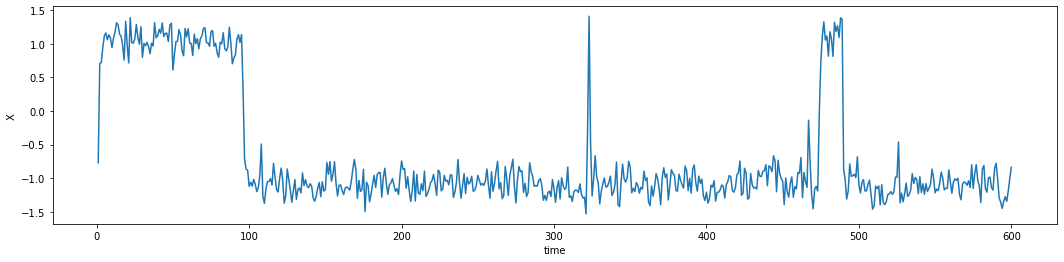

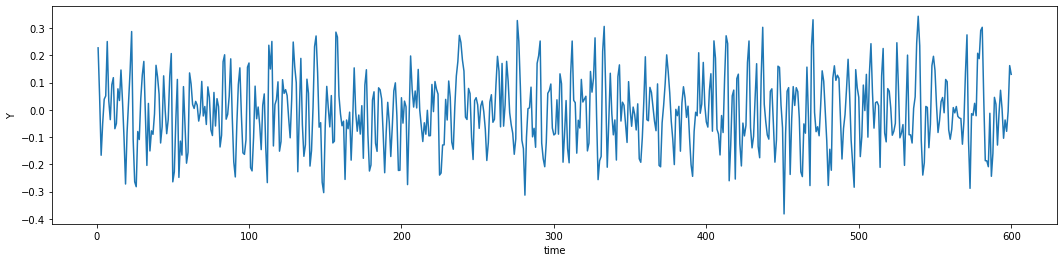

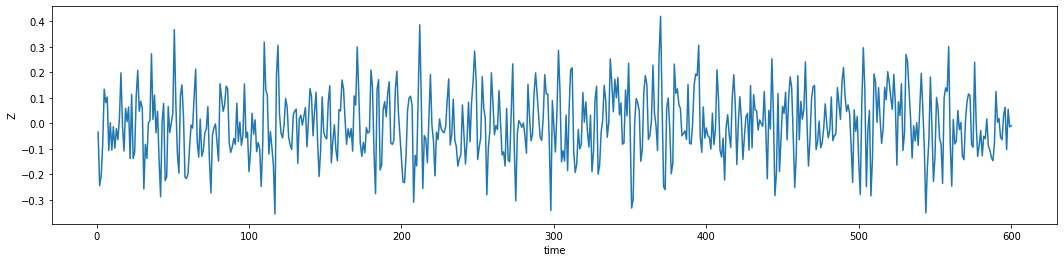

In [9]:
plt.rcParams['figure.figsize'] = 18, 4
for ii, ylabel in zip(range(3),['X','Y','Z']):
    plt.plot(times,positions[:,ii])
    plt.ylabel(ylabel)
    plt.xlabel('time')
    plt.show()

In [10]:
limite_minimo_x = -2.0 * unit.nanometers
limite_maximo_x = 2.0 * unit.nanometers
n_bins = 200
delta_x = (limite_maximo_x - limite_minimo_x)/n_bins 

histograma, bin_limites = np.histogram(positions[:,0,0]._value, bins=n_bins, range=[limite_minimo_x._value, limite_maximo_x._value])

plt.bar(bin_limites[:-1], histograma, width = delta_x._value)
plt.xlim(limite_minimo_x._value, limite_maximo_x._value)
plt.show()

IndexError: too many indices for array